## Unsupervised Learning

### Clustering

In clustering, the frequency of past observations is used to determine reigions in $x$ where observations are likely to occur. 

These regions are known as "clusters" and data which comes clumped into "clusters" suggests that what's being observed (eg., people, animals, diseases, ...) comes in distinct categories (, species, groups, types...).

In [122]:
x_strength = np.r_[
    np.random.normal(25, 5, 25),
    np.random.normal(100, 5, 25),
    np.random.normal(25, 5, 25),
    np.random.normal(100, 10, 25),
    np.random.normal(100, 5, 25),
]
x_stamina = np.r_[
    np.random.normal(25, 5, 25),
    np.random.normal(25, 2, 25),
    np.random.normal(100, 5, 25),
    np.random.normal(100, 5, 25),
    np.random.normal(60, 10, 25),
]

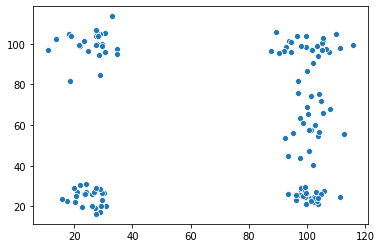

In [123]:
sns.scatterplot(x_strength, x_stamina);

In [124]:
X = np.c_[x_strength, x_stamina]

In [2]:
from sklearn.cluster import KMeans

In [131]:

kmeans = KMeans(n_clusters=5).fit(X)

Y = kmeans.cluster_centers_
Y

array([[100.8019018 ,  25.71748494],
       [100.36661394,  97.85453867],
       [ 25.92904146,  99.81200706],
       [ 24.94466853,  24.40975105],
       [101.03432215,  60.84465499]])

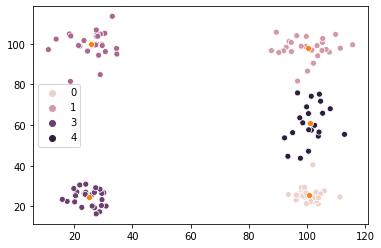

In [132]:
sns.scatterplot(X[:, 0], X[:, 1], hue=kmeans.labels_)
sns.scatterplot(Y[:, 0], Y[:, 1]);

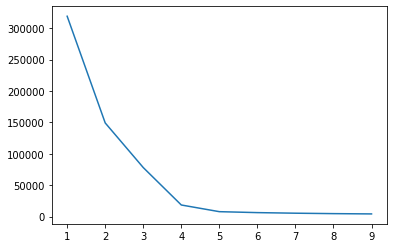

In [134]:
results = {}
for k in range(1, 10):
    results[k] = KMeans(k).fit(X).inertia_
    
sns.lineplot(list(results.keys()), list(results.values()))

### Exercise

A business sells sophisticated electroinc devices; to do this they hire several groups of employees:
* highly technical repair staff
* retail works
* technical managers
* shop floor managers
    
They hire you to find metrics which could improve their hiring process.
    
* choose two metrics ($x_0, x_1$) which would differentiate members of these groups

* generate clusers for each which approximate what you could find in such an organization

* using KMeans, find the cluster centres of these groups

* and hence report "target" values of $x_0$ and $x_1$ for the hiring process of each group

### Dimensionality Reduction

For high-dimensional datasets machine learning algorithms will often struggle to find good models (eg., images with 1024x1024 pixels, have $1024^2$ dimensions!). 

The algorithm will try a large number of models, but with a very large number of choices, it take a very long time to find a good one -- and may never. The search space for a "good model" can quickly become effectively infinite. 

To solve this problem we can reduce the number of dimensions in the input, ie., find some way to rephrase the dataset so the data we retain keeps a maximum amount of information without loosing too much.

#### A Simple Example
Consider the data set below. Notice that `X[:, 1]` is almost `2*X[:, 0] + 1` ...

In [2]:
import numpy as np
from sklearn.decomposition import PCA

In [3]:
X = np.array([
    [1, 3.01],
    [2, 5.01],
    [3, 7.01],
    [4, 9.00],
])

In [4]:
x0 = X[:, 0:1]
x1 = X[:, 1:]

Suppose I just delete x1... I can still recover it from x0...

In [5]:
2*x0 + 1

array([[3.],
       [5.],
       [7.],
       [9.]])

Or to find these numbers automatically...

In [6]:
lr = LinearRegression().fit(x0, x1)

NameError: name 'LinearRegression' is not defined

and to recover x1 from x0 alone...

In [7]:
lr.predict(x0)

NameError: name 'lr' is not defined

To do this, `lr` stores two numbers (the slope and intercept).

So I have to keep a model around (of `n` parameters, here `2`) but get to discard an entire column without much loss of information.

### PCA

The general approach is to use `PCA` which is a more complex (linear) approximation method where every column of the new data set is a combination of every column in the old set. 

The columns are then ranked from most-variation to least-variation so the last columns may be deleted without loosing much information. The more columns removed, the more information lost. 

The remaining column, as a combinaton of all previous, is set up so as to maximize the distinctiveness of each row; that is, points distinct (at some distance apart) in $(x_0, x_1)$ should still be distinct in just $(X^{pca}_0)$.

In [8]:
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X).round(2)
X_pca

array([[ 3.35, -0.  ],
       [ 1.12,  0.  ],
       [-1.12,  0.  ],
       [-3.35, -0.  ]])

the numbers now in the first column should be almost *as distinct* as the numbers in the original...

In [206]:
print("distance from point0 to point1:")
print()

print("using all columns of original X: " +
    str(distance(X[0, :], X[1, :]))
)    

print("using only the first column of X_pca: " +
    str(distance(X_pca[0, 0], X_pca[1, 0]))
)    

distance from point0 to point1:

using all columns of original X: 2.23606797749979
using only the first column of : 2.23


Comparing the distance between every point (2-col) in the original to the PCA'd set (1-col), the mean difference is negliable.

Ie., every point is as distinct in the new set as in the old. 

This difference roughly captures the loss of information. 

In [220]:
mean(
 distance(X[i, :], X[j,:]) - distance(X_pca[i, 0], X_pca[j, 0])
 for i in range(4) 
 for j in range(4)
 if i != j
)

-0.0010241362316142737

When we invert, we recover what we had:

In [211]:
pca.inverse_transform(X_pca).round()

array([[1., 3.],
       [2., 5.],
       [3., 7.],
       [4., 9.]])

Note that the new column, $X^{pca}_0$ uses some partial combination of all previous columns in $X$ and is therefore rarely "meaningful". 

When reducing dimensions with PCA, the final set of columns are essentially a merely statistical set of numbers with a useful property (that there distances are close to the orginal set) -- in general, there's no clear interpretation to give these numbers.

(In explanatory and scientific uses of PCA, results can sometimes be given an explanatory interpretation. Consider taking the scores of several cognitive tests and PCA'ing them -- the single reduced number would likely serve as an excellent IQ measure). 

### Exercise

* Consider the following eigenfaces example.
    * Here 'eigen' means 'characteristic' and refers to the PCA components of the transformed dataset
    * How should these components be interpreted?


Ref. https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html
    
    

In [17]:
from sklearn.datasets import fetch_lfw_people

# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples:", n_samples)
print("n_features:", n_features)
print("n_classes:", n_classes)
print(', '.join(target_names))

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Ariel Sharon, Colin Powell, Donald Rumsfeld, George W Bush, Gerhard Schroeder, Hugo Chavez, Tony Blair


In [20]:
def plot_gallery(images, titles, h=h, w=w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
    plt.show()

In [36]:
def pca_faces(n):
    print(f"Keeping: {100 * n / n_features : .2f} % of features")

    pca = PCA(n_components=n, svd_solver='randomized', whiten=True).fit(X)
    eigenfaces = pca.components_.reshape((n, h, w))

    plot_gallery(eigenfaces, [f"eigenface {i}" for i in range(eigenfaces.shape[0])]);

Keeping:  10.81 % of features


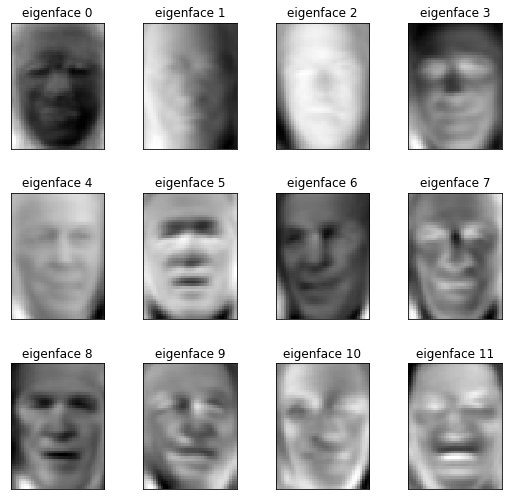

In [44]:
pca_faces(200)

### Aside: Understanding PCA

### Feature Engineering with Neural Networks    